# GMC Estimated Growth Mapping with Python

This notebook uses Python to explain the growth of Geiger Muller counters in the United States, by using estimated data.

### Import necessary packages.

In [1]:
%matplotlib inline
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, writers
import cartopy
from IPython import display

### Create a dataframe of GM counters and add longitudes latitudes.

In [2]:
df0 = pd.read_csv("https://lipy.us/data/ZipToLlongLat.csv")
df1 = pd.read_csv("https://lipy.us/data/gm_counters_esti.csv")
df1 = df1.merge(df0, left_on='zip', right_on="Postal", how='left')
df1 = df1.dropna(subset=['Longitude','Latitude'])
df1 = df1[['begdate', 'Longitude', 'Latitude']]
df1 = df1.sort_values(by=['begdate'], ascending=True)
df1['Year'] = pd.DatetimeIndex(df1['begdate']).year
df1['Month'] = pd.DatetimeIndex(df1['begdate']).month
df1.head()

,begdate,Longitude,Latitude,Year,Month
17242,1/1/2001,-81.8140,36.4657,2001,1
20682,1/1/2001,-93.2218,30.1693,2001,1
10649,1/1/2005,-89.7952,40.6798,2005,1
13669,1/1/2006,-84.3530,42.8627,2006,1
8148,1/1/2008,-81.9654,34.9352,2008,1


### Make a folder for output files.

In [3]:
dou = "Outs"
mou = dou + "/GmcMap.mp4"
pou = dou + "/GmcAggPlot.jpg"
if not os.path.exists(dou):
  os.makedirs(dou)
if os.path.exists(mou):
  os.remove(mou)
if os.path.exists(pou):
  os.remove(pou)

### Geomap the data to show the growth of GM counters.

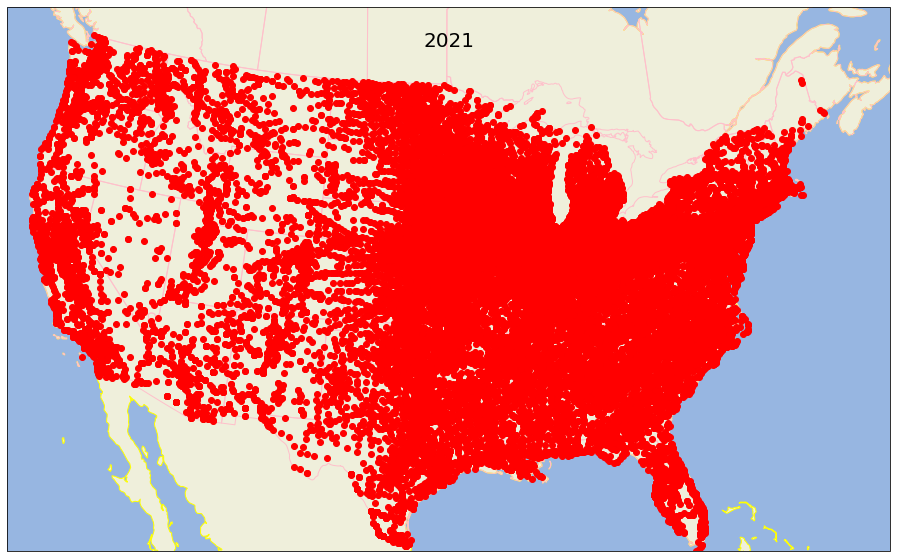

In [9]:
fig = plt.figure(figsize=(30, 10))
ext = [-120, -70, 23, 51]
ax = plt.axes(projection=cartopy.crs.AlbersEqualArea(np.mean(ext[:2]), np.mean(ext[2:])))
ax.set_extent(ext)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='yellow')
ax.add_feature(cartopy.feature.STATES, edgecolor='pink')

for iyr in range(1959, 2022):
    try:
        # ax.plot(df1.iloc[i][1], df1.iloc[i][2],'ro',transform=cartopy.crs.Geodetic()) # for each point separately
        df2 = df1[df1['Year']==iyr]
        ax.plot(df2.Longitude, df2.Latitude,'ro',transform=cartopy.crs.Geodetic())
        plt.title(iyr, fontsize=20)
        display.display(plt.gcf())
        display.clear_output(wait=True)
        time.sleep(0.1)
    except KeyboardInterrupt:
        break

### Prepare a video file of the geomap.

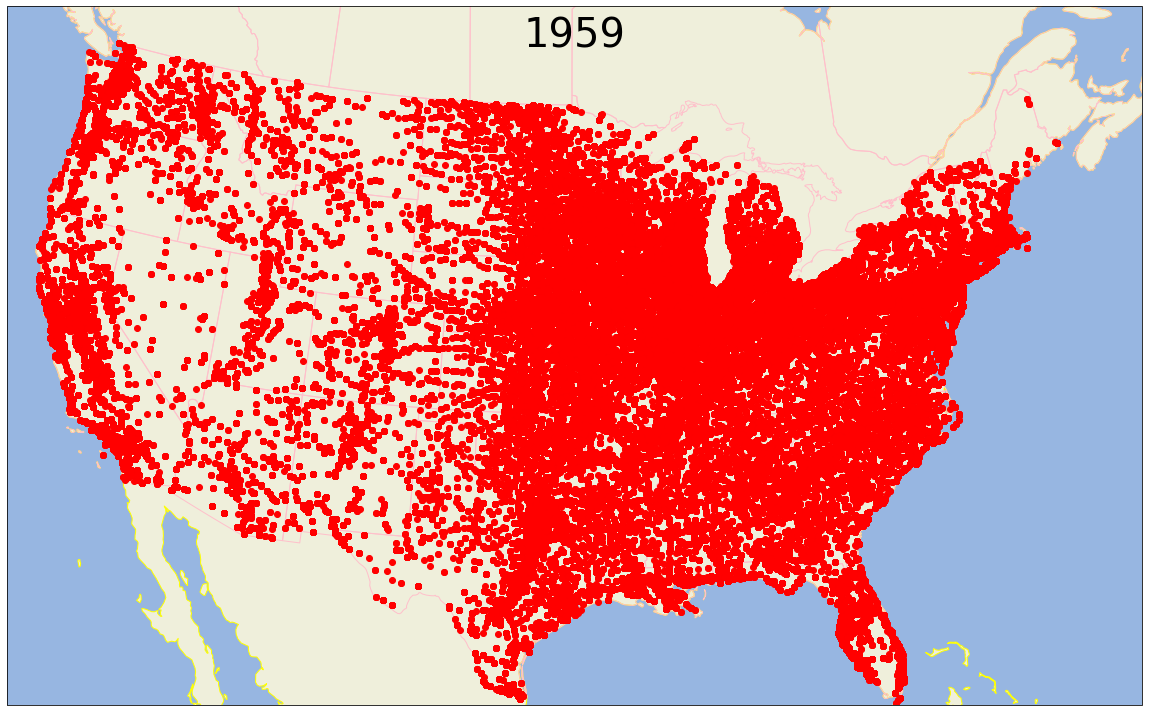

In [4]:
fig = plt.figure(figsize=(30, 10))
ext = [-120, -70, 23, 51]

ax = plt.axes(projection=cartopy.crs.AlbersEqualArea(np.mean(ext[:2]), np.mean(ext[2:])))
ax.set_extent(ext)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='yellow')
ax.add_feature(cartopy.feature.STATES, edgecolor='pink')
ax.set_aspect('equal')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# im = ax.imshow([], [], cmap='gray', interpolation='nearest')
# im.set_clim([0, 1])
plt.tight_layout()
plt.rcParams['axes.titley'] = 1.0
plt.rcParams['axes.titlepad'] = -40
byr = 1959

def animate(i):
    # dat = df1.iloc[:int(i+1)] # for each point separately
    dat = df1[df1['Year'] < byr+i]
    xp = []
    yp = []
    lis = dat
    for lin in lis:
        xp = dat['Longitude']
        yp = dat['Latitude']
    ax.plot(xp, yp, 'ro', transform=cartopy.crs.Geodetic())
    plt.title(byr+i, fontsize=40)

ani = FuncAnimation(fig, animate, frames=2022-byr, interval=0.1)
Writer = writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
ani.save(mou, writer=writer)

### Aggregate the data by month.

In [5]:
df2 = df1.groupby(['Year','Month']).count()
df2 = df2.reset_index()
df2['YearMo'] = df2['Year'] + df2['Month']/100
df2 = df2[['YearMo','begdate']].rename(columns={'begdate':"New"})
df2['Total'] = df2['New'].cumsum()
df2.tail()

,YearMo,New,Total
446,2021.08,411,26499
447,2021.09,410,26909
448,2021.10,403,27312
449,2021.11,389,27701
450,2021.12,390,28091


### Plot monthly data.

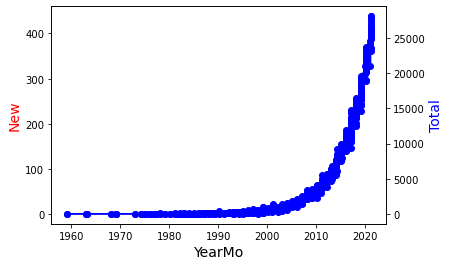

In [6]:
fig, ax = plt.subplots()
ax.plot(df2['YearMo'], df2['New'], color="blue", marker="o")
ax.set_xlabel("YearMo",fontsize=14)
ax.set_ylabel("New", color="red", fontsize=14)

ax2 = ax.twinx()
ax2.plot(df2['YearMo'], df2['Total'], color="blue", marker="o")
ax2.set_ylabel("Total", color="blue", fontsize=14)
plt.show()
fig.savefig(pou, format='jpeg', dpi=100, bbox_inches='tight')

### Conclusions

The number of GM counters has been increasing exponentially.

Many locations need GM counters, and more GM counters are needed, to improve monitoring of ionization radiations.